In [1]:
import numpy, sys

sys.path.append('../src')
sys.path.append('../lib')
import mhd_utils
import matplotlib.pyplot as plt

In [2]:
image = '../data/ProstateX/train/ktrans/ProstateX-0000/ProstateX-0000-Ktrans.mhd'

In [3]:
x = 56
y = 75
z = 7

In [4]:
meta_header = mhd_utils.read_meta_header(image)

In [5]:
meta_header

{'AnatomicalOrientation': 'RAI',
 'BinaryData': True,
 'BinaryDataByteOrderMSB': False,
 'CenterOfRotation': [0.0, 0.0, 0.0],
 'CompressedData': True,
 'CompressedDataSize': '772650',
 'DimSize': [128, 128, 16],
 'ElementDataFile': 'ProstateX-0000-Ktrans.zraw',
 'ElementSpacing': [1.5, 1.5, 3.0],
 'ElementType': 'MET_DOUBLE',
 'NDims': 3,
 'ObjectType': 'Image',
 'Offset': [-58.4317, -82.1226, -23.9969],
 'TransformMatrix': [0.999999,
  -0.00039861,
  -0.00119198,
  2.00335e-10,
  0.948376,
  -0.317147,
  0.00125686,
  0.317147,
  0.948376]}

In [6]:
image, meta = mhd_utils.load_raw_data_with_mhd(image)

3
MET_DOUBLE
../data/ProstateX/train/ktrans/ProstateX-0000/ProstateX-0000-Ktrans.zraw


In [7]:
image.shape

(128, 128, 16)

In [10]:
from matplotlib import pyplot, cm, gridspec
from numpy import *

def show(image,slide):
    img = image[:,:,slide]
    img = (img - mean(img) )/ std(img)
    dpi = 10
    fig = pyplot.figure(figsize=(img.shape[0]/dpi, 2*img.shape[1]/dpi), dpi=dpi)
    
    pyplot.subplot2grid((1,2), (0,0))
    pyplot.imshow(img, cmap='Greys_r',vmin=-1,vmax=2)
    pyplot.axis('off')
    
    pyplot.subplot2grid((1,2), (0,1))
    pyplot.scatter([x], [y], s=[10], c='r')
    pyplot.imshow(img, cmap='Greys_r',vmin=-1,vmax=2)
    pyplot.axis('off')
    pyplot.show()
    

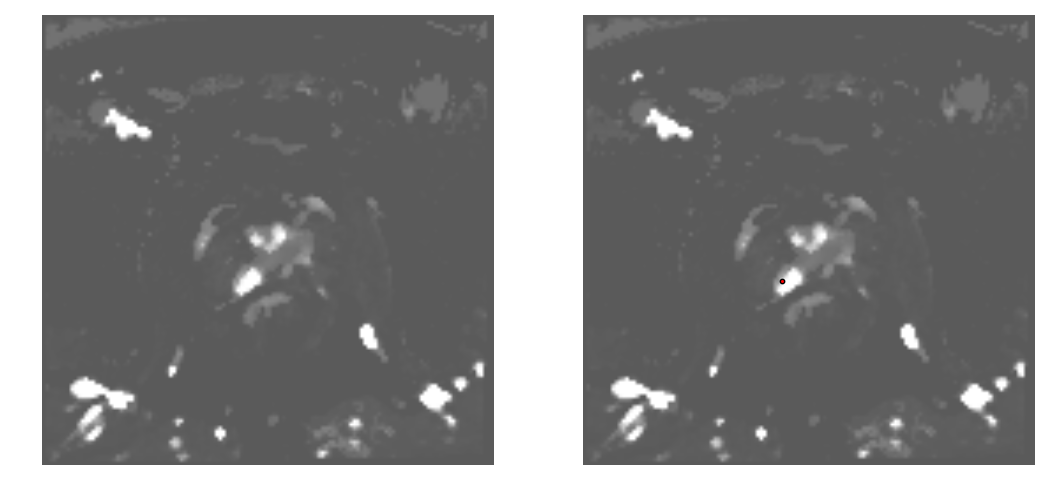

In [11]:
from ipywidgets import interact, interactive, fixed
interact(show,\
         image=fixed(image),\
         slide=(0,image.shape[2]-1),\
        );